# Test de l'opérateur ProblemDiscontinu

In [1]:
import sys

sys.path = ['/home/as259691/PycharmProjects/FluidDyn1D'] + sys.path

In [2]:
from src.main_discontinu import *
from src.plot_fields import *

%matplotlib notebook
rc('figure', figsize=(10,5))
rc('figure', dpi=100)

## Paramètres de la simulation

Ici on va réaliser une simulation sans diffusion pour différentes écritures de notre équation thermique.

La résolution se fait à chaque fois en WENO avec Euler explicite en temps.

In [3]:
n_lim = 1
t_fin_lim = 0.01

In [4]:
# d = 6./100*Delta/2.
phy_prop = PhysicalProperties(Delta=0.02, v=0., dS=0.005**2,
                              lda1=5.5*10**-2, lda2=15.5, rho_cp1=70278., rho_cp2=702780., diff=1.,
                              alpha=0.06, a_i=357.)
num_prop = NumericalProperties(dx=3.9*10**-5, schema='upwind', time_scheme='euler', phy_prop=phy_prop, cfl=0.5)
markers = BulleTemperature(phy_prop=phy_prop, x=num_prop.x, n_bulle=1)
markers.shift(0.00001)
# markers = Bulles(phy_prop=phy_prop)

dt fourier
6.918433404737903e-06
Cas : diffusion, euler, upwind, dx = 3.90625e-05, dt = 6.91843e-06


<IPython.core.display.Javascript object>


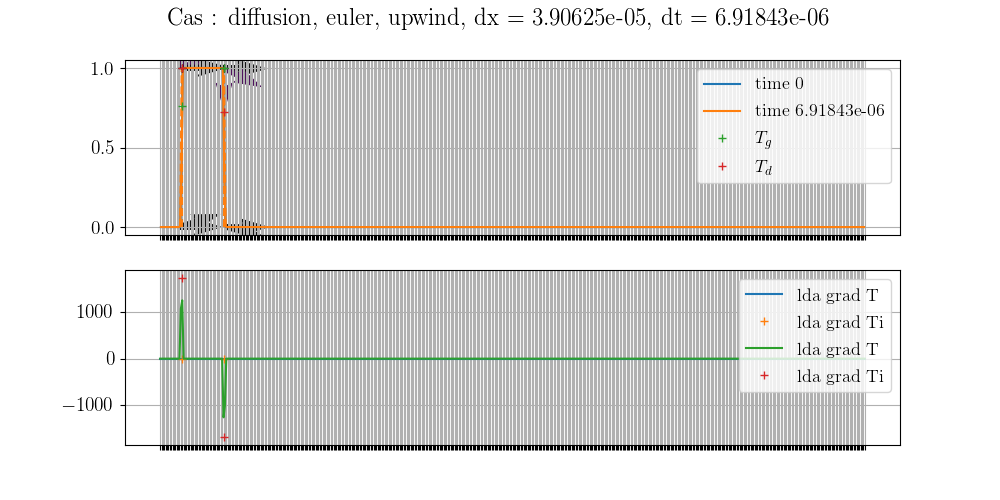

<IPython.core.display.Javascript object>


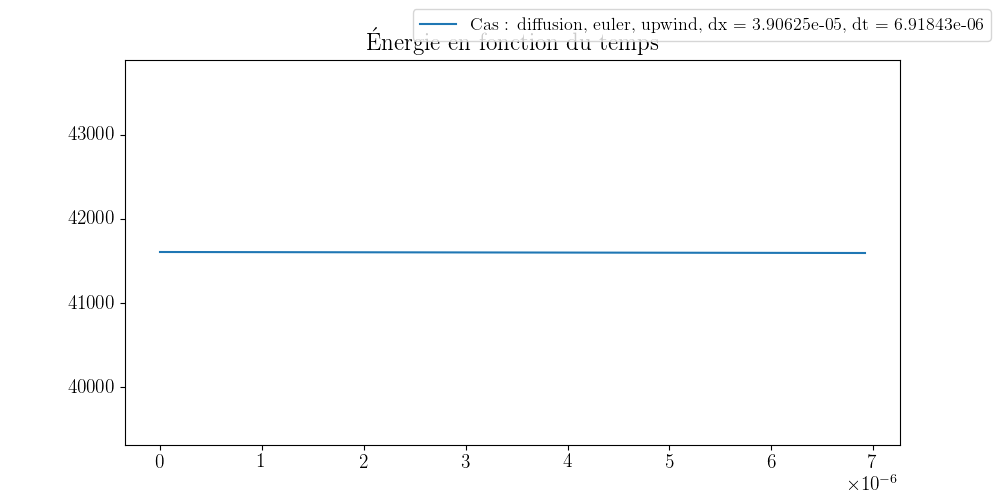

dE*/dt* = -1.66804e-16


In [5]:
t_fin = 0.2
prob = ProblemDiscontinu(get_T_creneau, markers=markers, phy_prop=phy_prop, num_prop=num_prop, interp_type='Ti')
E0 = prob.energy
print(prob.name)
print('==========================')
plot = Plotter('classic')
t, e = prob.timestep(t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=plot)

fig1,ax1 = plt.subplots(1)
ax1.set_title('Énergie en fonction du temps')
l = ax1.plot(t, e/(0.02*0.005*0.005), label=prob.name)
le = fig1.legend()

# plot.ax.plot(prob.bulles.markers.flatten(), prob.bulles.T.flatten(), 'r+')
# plot.ax.plot(prob.bulles.markers.flatten(), prob.bulles.Tg.flatten(), 'g+')
# plot.ax.plot(prob.bulles.markers.flatten(), prob.bulles.Td.flatten(), 'b+')

n = len(e)
i0 = int(n/5)
dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob.dt / E0  # on a mult
# par Dt / rho_cp_l T_l V
print('dE*/dt* = %g' % dedt_adim)

dt fourier
6.918433404737903e-06
Cas : diffusion, euler, upwind, dx = 3.90625e-05, dt = 6.91843e-06


<IPython.core.display.Javascript object>


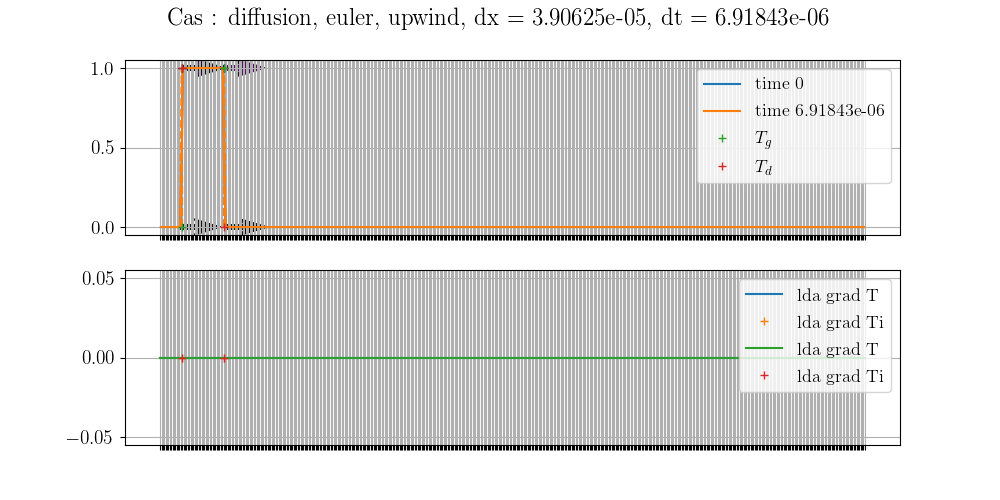

<IPython.core.display.Javascript object>


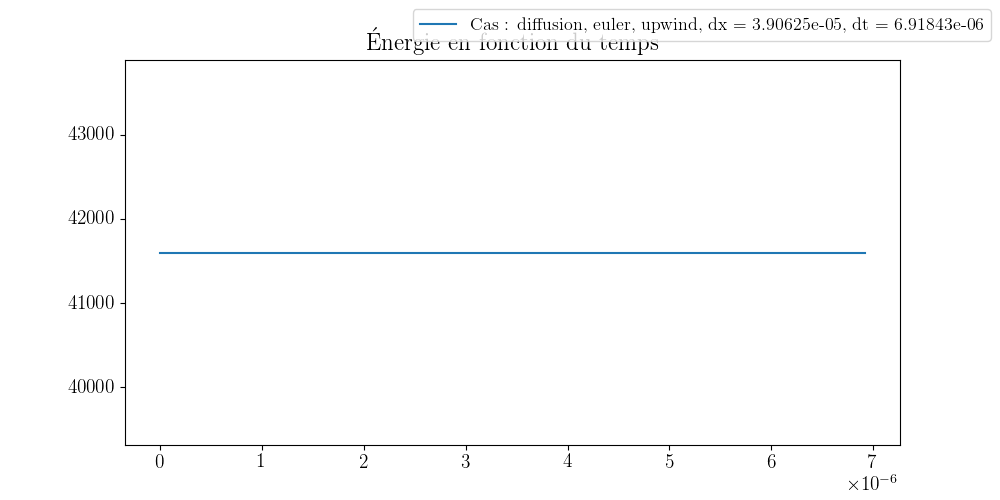

dE*/dt* = 0


In [6]:
t_fin = 0.2
prob = ProblemDiscontinu(get_T_creneau, markers=markers, phy_prop=phy_prop, num_prop=num_prop, interp_type='gradTi')
E0 = prob.energy
print(prob.name)
print('==========================')
plot = Plotter('classic')
t, e = prob.timestep(n=n_lim,t_fin=min(t_fin, t_fin_lim), number_of_plots=2, plotter=plot)

fig1,ax1 = plt.subplots(1)
ax1.set_title('Énergie en fonction du temps')
l = ax1.plot(t, e/(0.02*0.005*0.005), label=prob.name)
le = fig1.legend()

# plot.ax.plot(prob.bulles.markers.flatten(), prob.bulles.T.flatten(), 'r+')
# plot.ax.plot(prob.bulles.markers.flatten(), prob.bulles.Tg.flatten(), 'g+')
# plot.ax.plot(prob.bulles.markers.flatten(), prob.bulles.Td.flatten(), 'b+')

n = len(e)
i0 = int(n/5)
dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob.dt / E0  # on a mult
# par Dt / rho_cp_l T_l V
print('dE*/dt* = %g' % dedt_adim)

dt fourier
6.918433404737903e-06
Cas : diffusion, euler, upwind, dx = 3.90625e-05, dt = 6.91843e-06


<IPython.core.display.Javascript object>


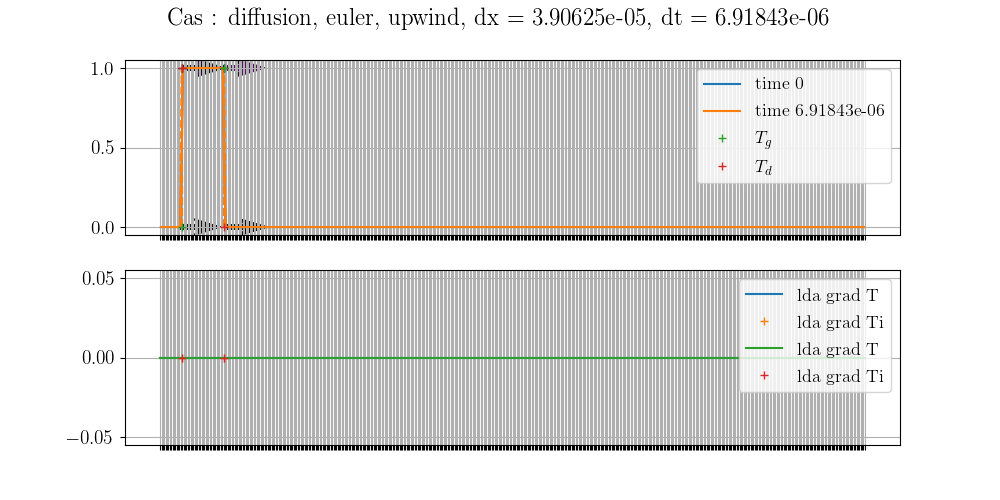

<IPython.core.display.Javascript object>


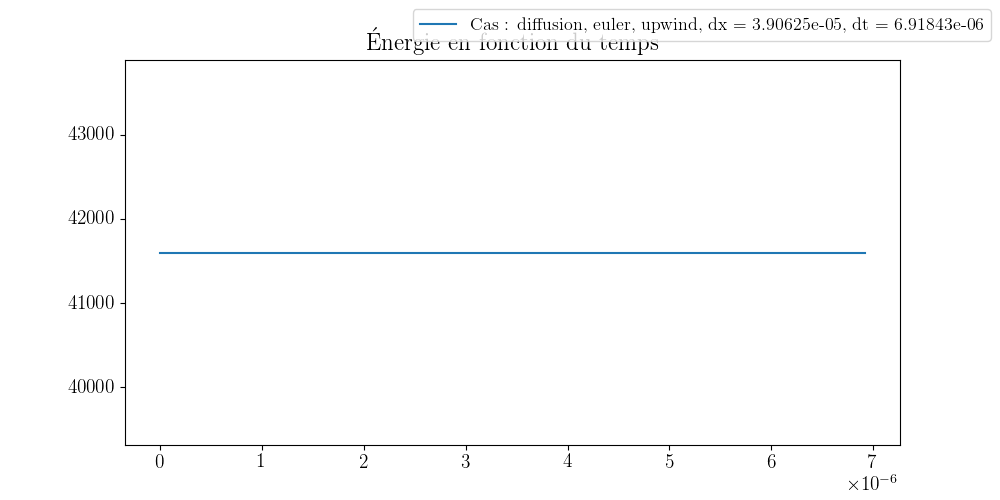

dE*/dt* = 0


In [7]:
t_fin = 0.2
prob = ProblemDiscontinu(get_T_creneau, markers=markers, phy_prop=phy_prop, num_prop=num_prop, interp_type='gradTi2')
E0 = prob.energy
print(prob.name)
print('==========================')
plot = Plotter('classic')
t, e = prob.timestep(n=n_lim,t_fin=min(t_fin, t_fin_lim), number_of_plots=2, plotter=plot)

fig1,ax1 = plt.subplots(1)
ax1.set_title('Énergie en fonction du temps')
l = ax1.plot(t, e/(0.02*0.005*0.005), label=prob.name)
le = fig1.legend()

# plot.ax.plot(prob.bulles.markers.flatten(), prob.bulles.T.flatten(), 'r+')
# plot.ax.plot(prob.bulles.markers.flatten(), prob.bulles.Tg.flatten(), 'g+')
# plot.ax.plot(prob.bulles.markers.flatten(), prob.bulles.Td.flatten(), 'b+')

n = len(e)
i0 = int(n/5)
dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob.dt / E0  # on a mult
# par Dt / rho_cp_l T_l V
print('dE*/dt* = %g' % dedt_adim)

## Test de la convection

Ici on met une vitesse de convection, et on supprime artificiellement la diffusion.

Pour augmenter la facilité du cas, on le réalise sur une température initiale continue.

In [8]:
phy_prop = PhysicalProperties(Delta=0.02, v=0.2, dS=0.005**2,
                              lda1=5.5*10**-2, lda2=15.5, rho_cp1=70278., rho_cp2=702780., diff=0.,
                              alpha=0.06, a_i=357.)
num_prop = NumericalProperties(dx=1*10**-5, schema='upwind', time_scheme='euler', phy_prop=phy_prop, cfl=0.5, fo=10.**250)
markers = BulleTemperature(phy_prop=phy_prop, x=num_prop.x, n_bulle=1)
markers.shift(0.00001)

dt cfl
2.501250625312656e-05
Cas : convection, euler, upwind, dx = 1.0005e-05, cfl = 0.5


<IPython.core.display.Javascript object>


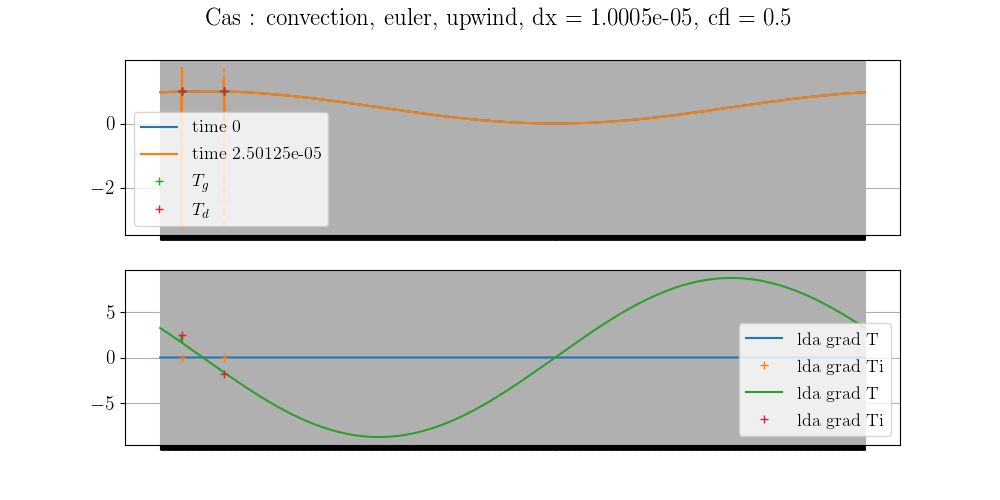

<IPython.core.display.Javascript object>


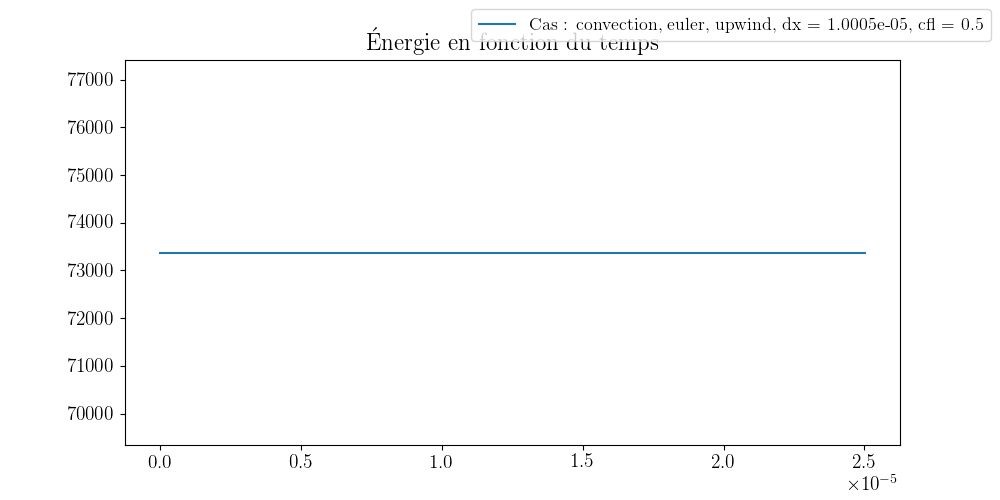

dE*/dt* = 0


In [9]:
prob = ProblemDiscontinu(get_T, markers=markers, phy_prop=phy_prop, num_prop=num_prop, interp_type='Ti')
E0 = prob.energy
print(prob.name)
print('==========================')
plot = Plotter('classic')
t, e = prob.timestep(t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=plot)

fig1,ax1 = plt.subplots(1)
ax1.set_title('Énergie en fonction du temps')
l = ax1.plot(t, e/(0.02*0.005*0.005), label=prob.name)
le = fig1.legend()

# plot.ax.plot(prob.bulles.markers.flatten(), prob.bulles.T.flatten(), 'r+')
# plot.ax.plot(prob.bulles.markers.flatten(), prob.bulles.Tg.flatten(), 'g+')
# plot.ax.plot(prob.bulles.markers.flatten(), prob.bulles.Td.flatten(), 'b+')

n = len(e)
i0 = int(n/5)
dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob.dt / E0  # on a mult
# par Dt / rho_cp_l T_l V
print('dE*/dt* = %g' % dedt_adim)


dt cfl
2.501250625312656e-05
Cas : convection, euler, upwind, dx = 1.0005e-05, cfl = 0.5


<IPython.core.display.Javascript object>


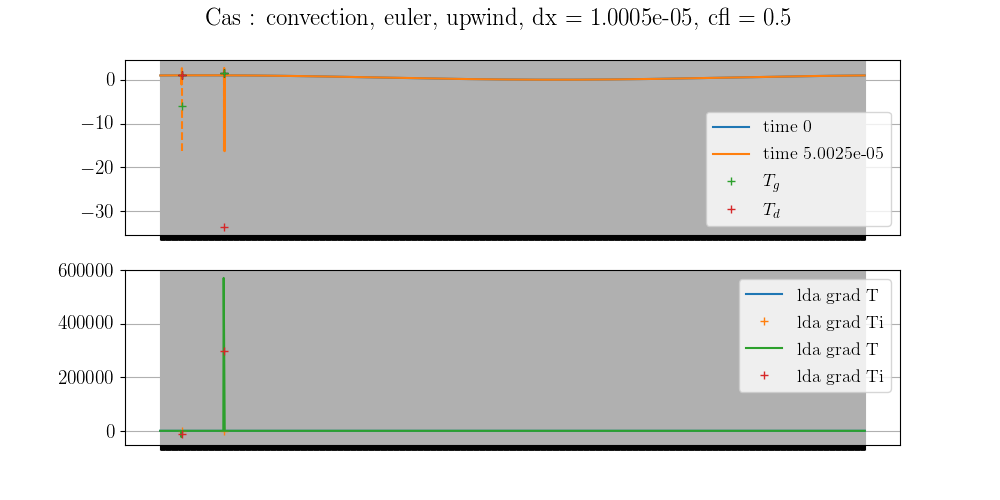

<IPython.core.display.Javascript object>


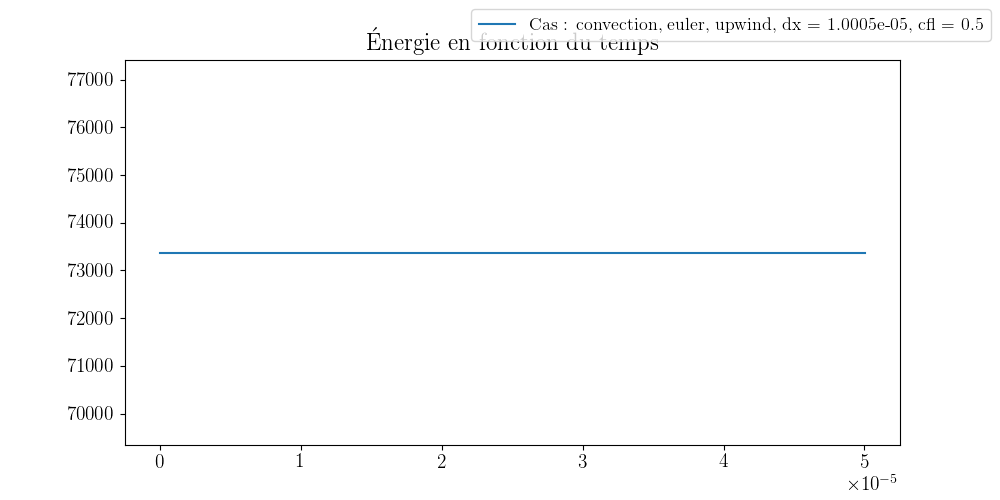

dE*/dt* = 0


<IPython.core.display.Javascript object>


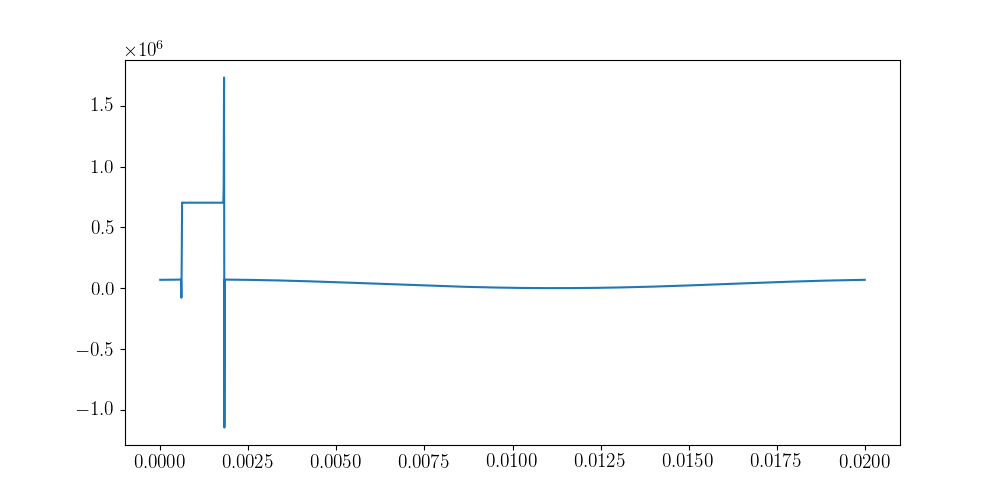

[0.97259754 0.97318586 0.97376954 ... 0.97080487 0.97140704 0.9720046 ]


In [10]:
print()
prob = ProblemDiscontinu(get_T, markers=markers, phy_prop=phy_prop, num_prop=num_prop, interp_type='gradTi')
E0 = prob.energy
print(prob.name)
print('==========================')
plot = Plotter('classic')
t, e = prob.timestep(n=n, t_fin=t_fin, number_of_plots=1, plotter=plot)

fig1,ax1 = plt.subplots(1)
ax1.set_title('Énergie en fonction du temps')
l = ax1.plot(t, e/(0.02*0.005*0.005), label=prob.name)
le = fig1.legend()

# plot.ax.plot(prob.bulles.markers.flatten(), prob.bulles.T.flatten(), 'r+')
# plot.ax.plot(prob.bulles.markers.flatten(), prob.bulles.Tg.flatten(), 'g+')
# plot.ax.plot(prob.bulles.markers.flatten(), prob.bulles.Td.flatten(), 'b+')

n = len(e)
i0 = int(n/5)
dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob.dt / E0  # on a mult
# par Dt / rho_cp_l T_l V
print('dE*/dt* = %g' % dedt_adim)
plt.figure()
plt.plot(prob.num_prop.x, prob.rho_cp_a*prob.T)
print(prob.T)


dt cfl
2.501250625312656e-05
Cas : convection, euler, upwind, dx = 1.0005e-05, cfl = 0.5


<IPython.core.display.Javascript object>


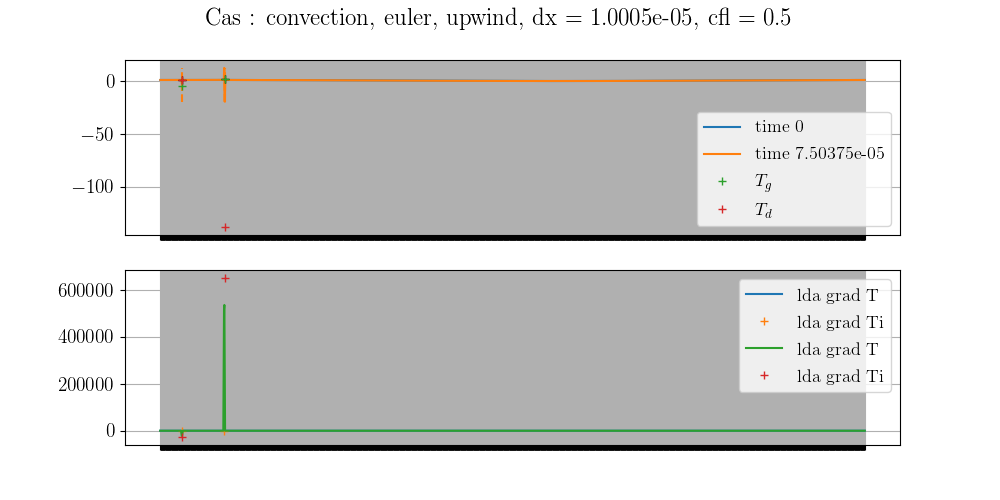

<IPython.core.display.Javascript object>


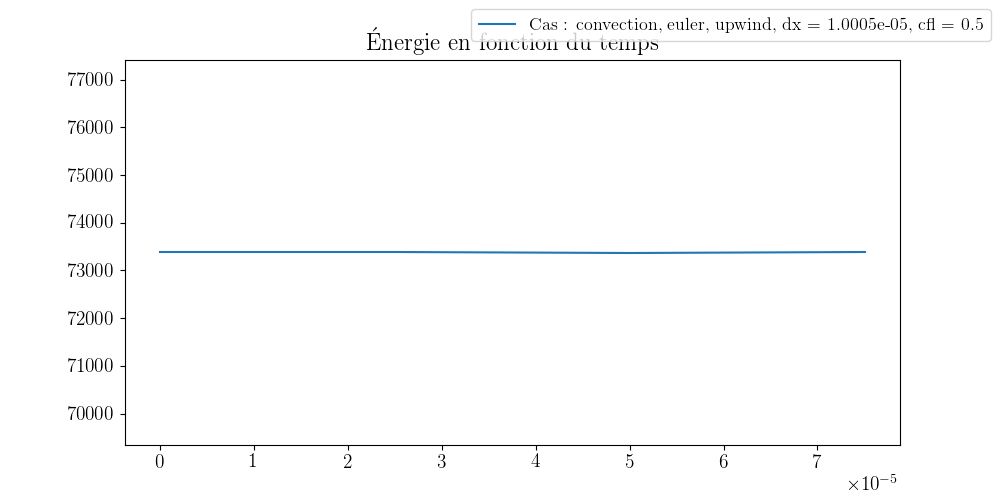

dE*/dt* = 0


<IPython.core.display.Javascript object>


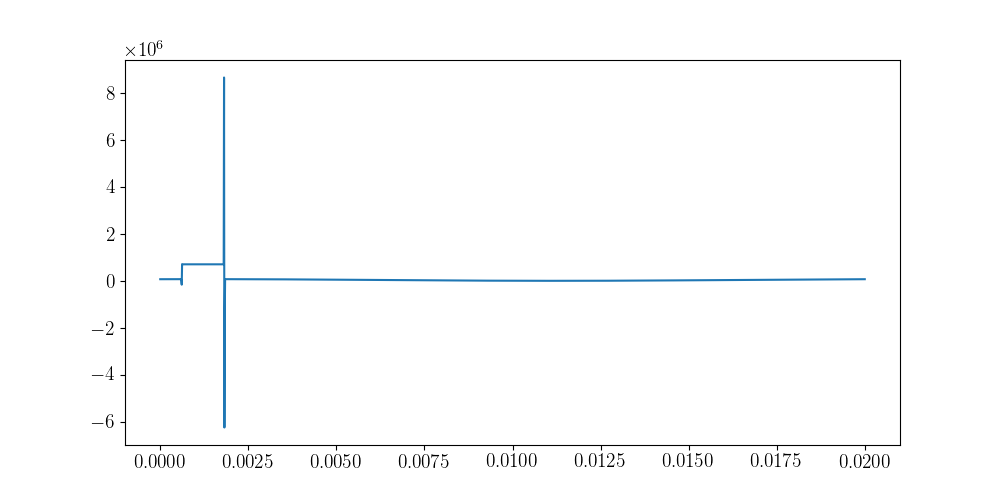

[0.97230107 0.9728917  0.9734777  ... 0.97050148 0.97110596 0.97170582]


In [11]:
print()
prob = ProblemDiscontinu(get_T, markers=markers, phy_prop=phy_prop, num_prop=num_prop, interp_type='gradTi2')
E0 = prob.energy
print(prob.name)
print('==========================')
plot = Plotter('classic')
t, e = prob.timestep(n=n, t_fin=t_fin, number_of_plots=1, plotter=plot)

fig1,ax1 = plt.subplots(1)
ax1.set_title('Énergie en fonction du temps')
l = ax1.plot(t, e/(0.02*0.005*0.005), label=prob.name)
le = fig1.legend()

# plot.ax.plot(prob.bulles.markers.flatten(), prob.bulles.T.flatten(), 'r+')
# plot.ax.plot(prob.bulles.markers.flatten(), prob.bulles.Tg.flatten(), 'g+')
# plot.ax.plot(prob.bulles.markers.flatten(), prob.bulles.Td.flatten(), 'b+')

n = len(e)
i0 = int(n/5)
dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob.dt / E0  # on a mult
# par Dt / rho_cp_l T_l V
print('dE*/dt* = %g' % dedt_adim)
plt.figure()
plt.plot(prob.num_prop.x, prob.rho_cp_a*prob.T)
print(prob.T)

# Probleme discontinu traité en déduisant $T_g^c$ et $T_d^c$ de T et h

In [12]:
# d = 6./100*Delta/2.
phy_prop = PhysicalProperties(Delta=0.02, v=0.2, dS=0.005**2,
                              lda1=5.5*10**-2, lda2=15.5, rho_cp1=70278., rho_cp2=702780., diff=0.,
                              alpha=0.06, a_i=357.)
# num_prop = NumericalProperties(dx=3.9*10**-5, schema='upwind', time_scheme='euler', phy_prop=phy_prop, cfl=0.5)
num_prop = NumericalProperties(dx=1*10**-5, schema='upwind', time_scheme='euler', phy_prop=phy_prop, cfl=1.)
markers = BulleTemperature(phy_prop=phy_prop, x=num_prop.x, n_bulle=1)
markers.shift(0.00001)
# markers = Bulles(phy_prop=phy_prop)

n = 300
# t_fin = 0.01


dt fourier
4.538601983461999e-07
Cas : convection, euler, upwind, dx = 1.0005e-05, cfl = 0.00907267


<IPython.core.display.Javascript object>


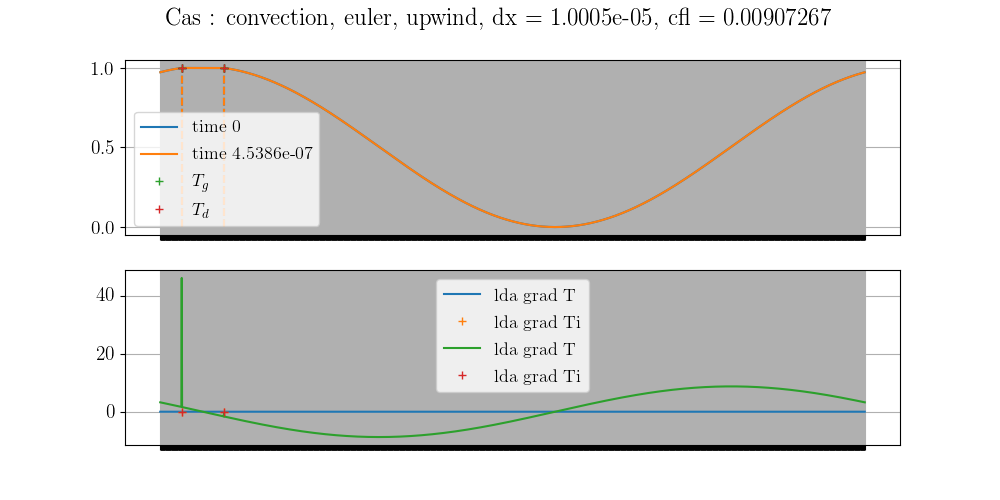

<IPython.core.display.Javascript object>


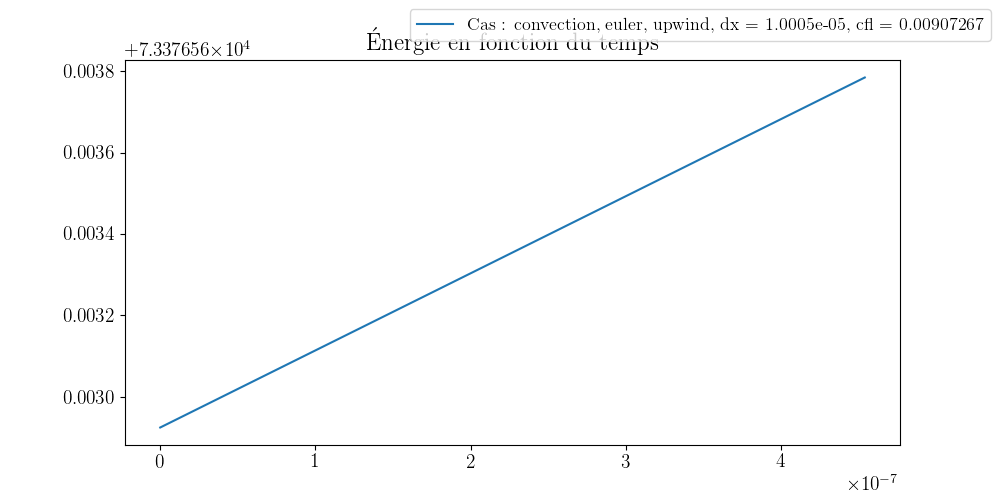

dE*/dt* = 1.17118e-08


<IPython.core.display.Javascript object>


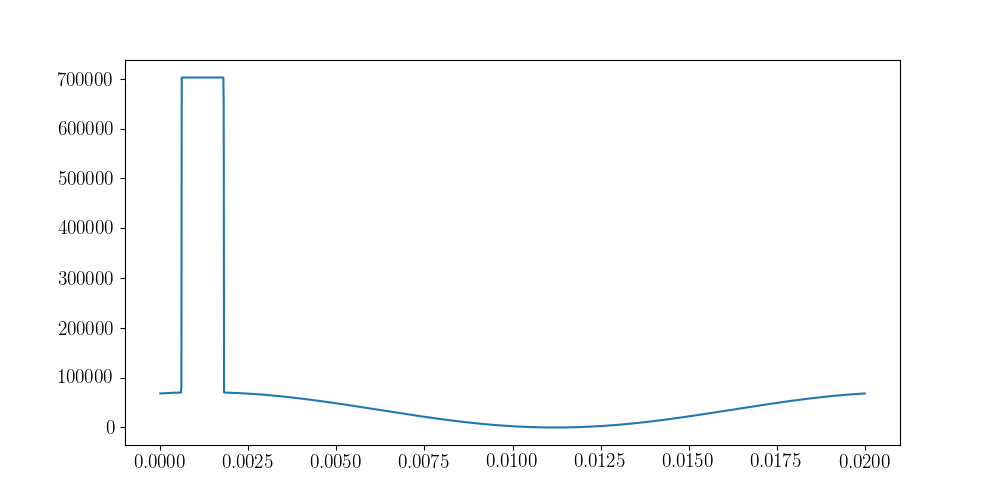

[0.9731817  0.97376543 0.97434452 ... 0.97140275 0.97200036 0.97259334]


In [13]:
print()
prob = ProblemDiscontinuEnergieTemperature(get_T, markers=markers, phy_prop=phy_prop, num_prop=num_prop)
E0 = prob.energy
print(prob.name)
print('==========================')
plot = Plotter('classic')
t, e = prob.timestep(n=min(n, n_lim), number_of_plots=3, plotter=plot)

fig1,ax1 = plt.subplots(1)
ax1.set_title('Énergie en fonction du temps')
l = ax1.plot(t, e/(0.02*0.005*0.005), label=prob.name)
le = fig1.legend()

# plot.ax.plot(prob.bulles.markers.flatten(), prob.bulles.T.flatten(), 'r+')
# plot.ax.plot(prob.bulles.markers.flatten(), prob.bulles.Tg.flatten(), 'g+')
# plot.ax.plot(prob.bulles.markers.flatten(), prob.bulles.Td.flatten(), 'b+')

n = len(e)
i0 = int(n/5)
dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob.dt / E0  # on a mult
# par Dt / rho_cp_l T_l V
print('dE*/dt* = %g' % dedt_adim)
plt.figure()
plt.plot(prob.num_prop.x, prob.rho_cp_a*prob.T)
print(prob.T)

# Test ProblemDiscontinuFT

## Juste la convection

In [14]:
n_lim = 1
t_fin_lim = 0.01

In [15]:
# d = 6./100*Delta/2.
phy_prop = PhysicalProperties(Delta=0.02, v=0.2, dS=0.005**2,
                              lda1=5.5*10**-2, lda2=15.5, rho_cp1=70278., rho_cp2=702780., diff=0.,
                              alpha=0.06, a_i=357.)
# num_prop = NumericalProperties(dx=3.9*10**-5, schema='upwind', time_scheme='euler', phy_prop=phy_prop, cfl=0.5)
num_prop = NumericalProperties(dx=1*10**-5, schema='upwind', time_scheme='euler', phy_prop=phy_prop, cfl=1.)
markers = BulleTemperature(phy_prop=phy_prop, x=num_prop.x, n_bulle=1)
markers.shift(0.00001)
# markers = Bulles(phy_prop=phy_prop)

n_lim = 10000
n = 6000
# t_fin = 0.01


dt fourier
4.538601983461999e-07
Cas : convection, euler, upwind, dx = 1.0005e-05, cfl = 0.00907267


<IPython.core.display.Javascript object>


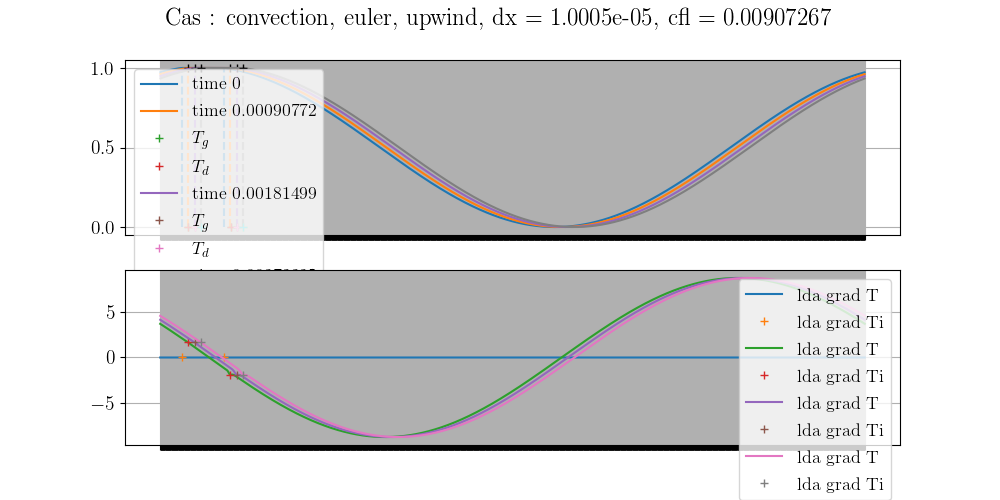

<IPython.core.display.Javascript object>


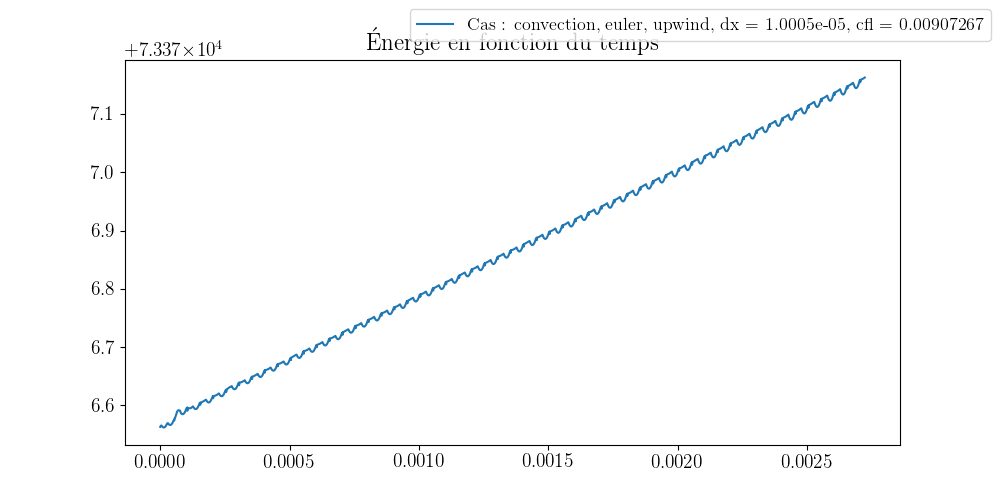

dE*/dt* = 1.3593e-09


<IPython.core.display.Javascript object>


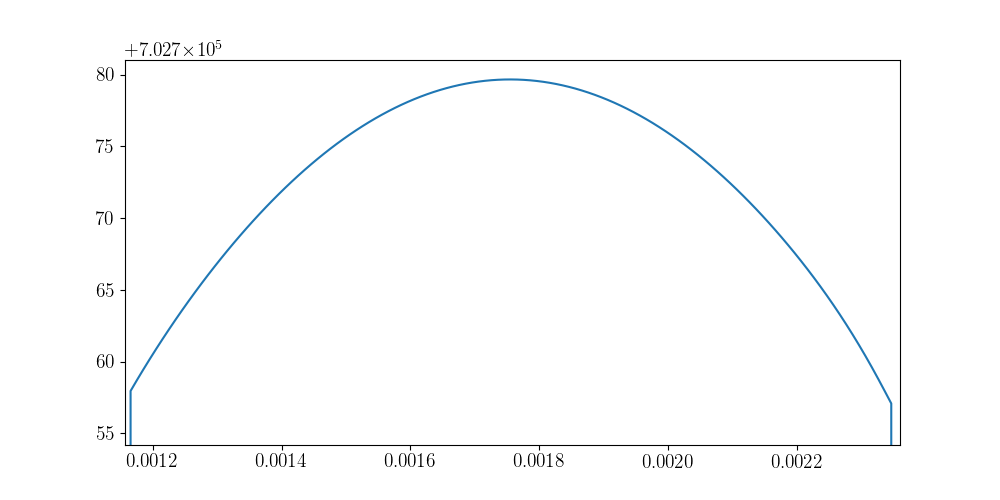

[0.93448372 0.93530968 0.93613138 ... 0.93198039 0.93281907 0.93365352]


In [16]:
print()
prob = ProblemDiscontinuFT(get_T, markers=markers, phy_prop=phy_prop, num_prop=num_prop)
E0 = prob.energy
print(prob.name)
print('==========================')
plot = Plotter('classic')
t, e = prob.timestep(n=min(n, n_lim), number_of_plots=3, plotter=plot)

fig1,ax1 = plt.subplots(1)
ax1.set_title('Énergie en fonction du temps')
l = ax1.plot(t, e/(0.02*0.005*0.005), label=prob.name)
le = fig1.legend()

# plot.ax.plot(prob.bulles.markers.flatten(), prob.bulles.T.flatten(), 'r+')
# plot.ax.plot(prob.bulles.markers.flatten(), prob.bulles.Tg.flatten(), 'g+')
# plot.ax.plot(prob.bulles.markers.flatten(), prob.bulles.Td.flatten(), 'b+')

n = len(e)
i0 = int(n/5)
dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob.dt / E0  # on a mult
# par Dt / rho_cp_l T_l V
print('dE*/dt* = %g' % dedt_adim)
plt.figure()
plt.plot(prob.num_prop.x, prob.rho_cp_a*prob.T)
print(prob.T)

## Avec diffusion aussi

In [24]:
n_lim = 10000000
t_fin_lim = 0.01

In [25]:
# d = 6./100*Delta/2.
phy_prop = PhysicalProperties(Delta=0.02, v=0.2, dS=0.005**2,
                              lda1=5.5*10**-2, lda2=15.5, rho_cp1=70278., rho_cp2=702780., diff=1.,
                              alpha=0.06, a_i=357.)
# num_prop = NumericalProperties(dx=3.9*10**-5, schema='upwind', time_scheme='euler', phy_prop=phy_prop, cfl=0.5)
num_prop = NumericalProperties(dx=1*10**-5, schema='upwind', time_scheme='euler', phy_prop=phy_prop, cfl=1.)
markers = BulleTemperature(phy_prop=phy_prop, x=num_prop.x, n_bulle=1)
markers.shift(0.00001)
# markers = Bulles(phy_prop=phy_prop)

n = 60000000000
t_fin = 0.2
# t_fin = 0.01


dt fourier
4.538601983461999e-07
Cas : mixte, euler, upwind, dx = 1.0005e-05, dt = 4.5386e-07, cfl = 0.00907267


<IPython.core.display.Javascript object>


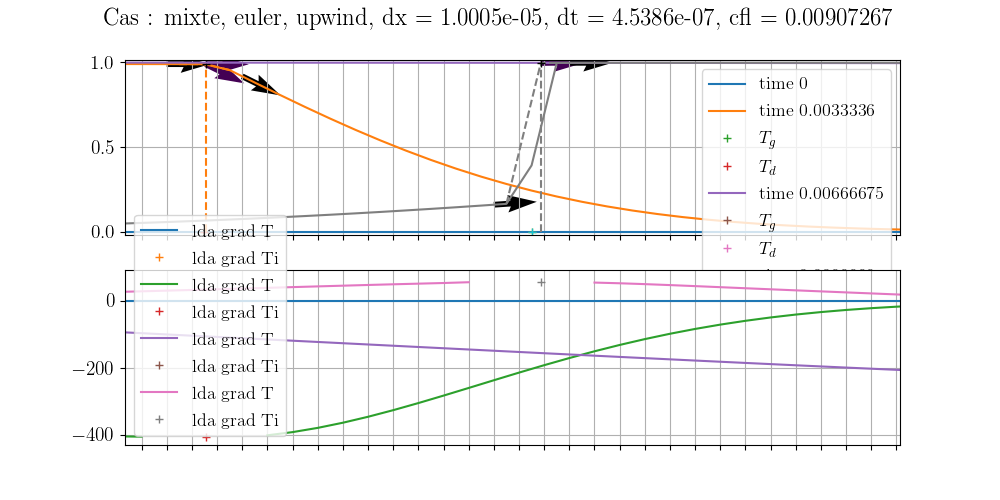

<IPython.core.display.Javascript object>


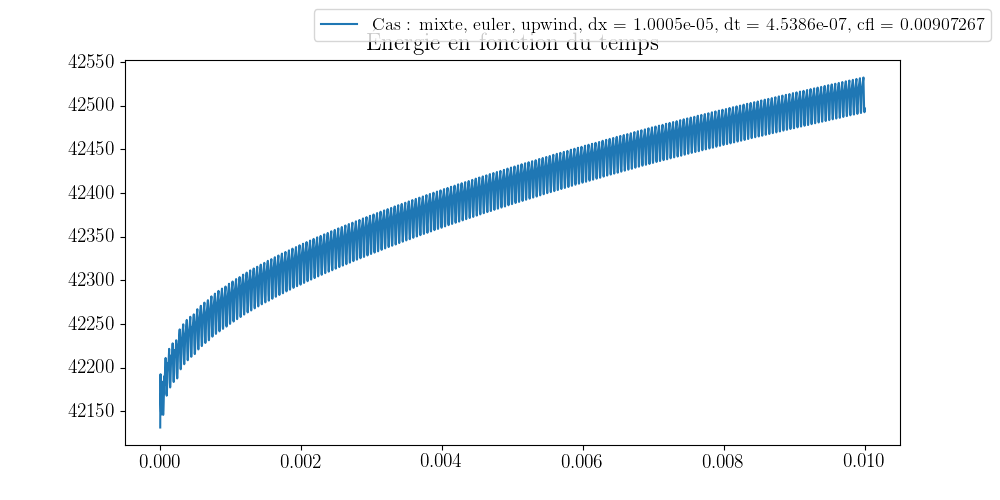

dE*/dt* = 2.49101e-07


<IPython.core.display.Javascript object>


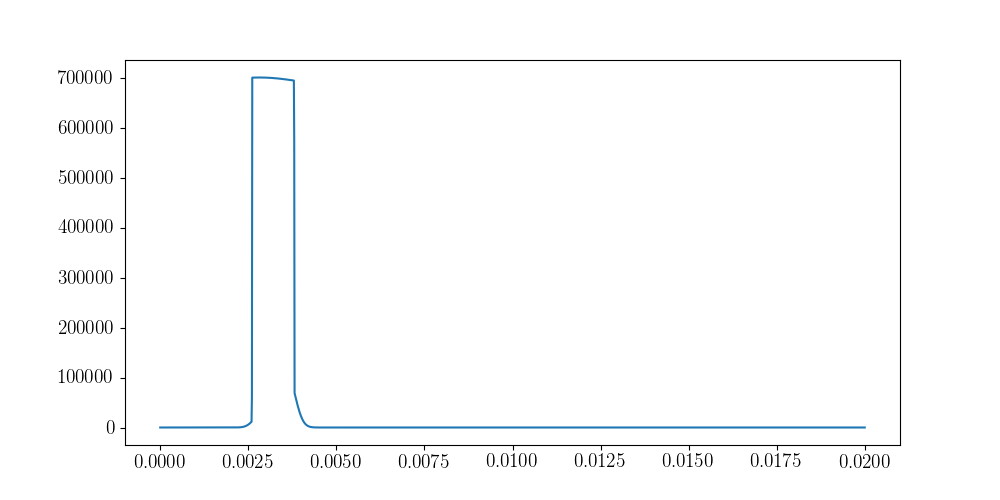

[4.38697743e-50 1.01866424e-49 2.35764214e-49 ... 3.43607981e-51
 8.05713606e-51 1.88313599e-50]


In [26]:
print()
prob = ProblemDiscontinuFT(get_T_creneau, markers=markers, phy_prop=phy_prop, num_prop=num_prop)
E0 = prob.energy
print(prob.name)
print('==========================')
plot = Plotter('classic')
t, e = prob.timestep(t_fin=min(t_fin, t_fin_lim), n=min(n, n_lim), number_of_plots=3, plotter=plot)

fig1,ax1 = plt.subplots(1)
ax1.set_title('Énergie en fonction du temps')
l = ax1.plot(t, e/(0.02*0.005*0.005), label=prob.name)
le = fig1.legend()

# plot.ax.plot(prob.bulles.markers.flatten(), prob.bulles.T.flatten(), 'r+')
# plot.ax.plot(prob.bulles.markers.flatten(), prob.bulles.Tg.flatten(), 'g+')
# plot.ax.plot(prob.bulles.markers.flatten(), prob.bulles.Td.flatten(), 'b+')

n = len(e)
i0 = int(n/5)
dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob.dt / E0  # on a mult
# par Dt / rho_cp_l T_l V
print('dE*/dt* = %g' % dedt_adim)
plt.figure()
plt.plot(prob.num_prop.x, prob.rho_cp_a*prob.T)
print(prob.T)